In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('data.csv',low_memory=False)

In [4]:
data.shape

(13299, 18)

In [5]:
data.columns

Index(['APP_ID', ' CIBIL_SCORE_VALUE ', 'NEW_CUST', 'CUS_CATGCODE ',
       ' EMPLOYMENT_TYPE ', 'AGE', ' SEX  ', ' NO_OF_DEPENDENTS ', ' MARITAL ',
       ' EDU_QUA', '  P_RESTYPE ', ' P_CATEGORY ', ' EMPLOYEE_TYPE ',
       '  MON_IN_OCC ', ' INCOM_EXP_GMI ', 'LTV', ' TENURE ', 'STATUS'],
      dtype='object')

In [6]:
rename={
    'APP_ID':'app_id',
    ' CIBIL_SCORE_VALUE ':'cibil_score',
    'NEW_CUST':'new_customer',
    'CUS_CATGCODE ':'category',
    ' EMPLOYMENT_TYPE ':'employment_type',
    'AGE':'age',
    'SEX':'sex',
    ' NO_OF_DEPENDENTS ':'no_of_dependencies',
    ' MARITAL ':'marital',
    ' EDU_QUA':'education',
    '  P_RESTYPE ':'residence',
    ' P_CATEGORY ':'house',
    ' EMPLOYEE_TYPE ':'employment_type',
    '  MON_IN_OCC ':'months_of_working',
    ' INCOM_EXP_GMI ':'income_expenses_ratio',
    'LTV':'asset_loan_ratio',
    ' TENURE ':'tenure',
    'STATUS':'loan_approval'
}
data=data.rename(columns=rename)

In [7]:
data.isnull().sum()/data.shape[0]*100

app_id                   0.0
cibil_score              0.0
new_customer             0.0
category                 0.0
employment_type          0.0
age                      0.0
 SEX                     0.0
no_of_dependencies       0.0
marital                  0.0
education                0.0
residence                0.0
house                    0.0
employment_type          0.0
months_of_working        0.0
income_expenses_ratio    0.0
asset_loan_ratio         0.0
tenure                   0.0
loan_approval            0.0
dtype: float64

In [8]:
data.columns

Index(['app_id', 'cibil_score', 'new_customer', 'category', 'employment_type',
       'age', ' SEX  ', 'no_of_dependencies', 'marital', 'education',
       'residence', 'house', 'employment_type', 'months_of_working',
       'income_expenses_ratio', 'asset_loan_ratio', 'tenure', 'loan_approval'],
      dtype='object')

In [9]:
data['loan_approval'].value_counts()/data.shape[0]*100

loan_approval
0    62.282878
1    37.717122
Name: count, dtype: float64

In [10]:
data.isna().sum()

app_id                   0
cibil_score              0
new_customer             0
category                 0
employment_type          0
age                      0
 SEX                     0
no_of_dependencies       0
marital                  0
education                0
residence                0
house                    0
employment_type          0
months_of_working        0
income_expenses_ratio    0
asset_loan_ratio         0
tenure                   0
loan_approval            0
dtype: int64

In [11]:
data.head(2)

,app_id,cibil_score,new_customer,category,employment_type,age,SEX,no_of_dependencies,marital,education,residence,house,employment_type,months_of_working,income_expenses_ratio,asset_loan_ratio,tenure,loan_approval
0,12345,0,YES,1,0,31,F,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,NO,1,1,40,F,2,1,1,0,1,1,12,2,0.619077,24,0


In [12]:
def convert_new_cust(val):
    return 1 if val=="YES" else 0

In [13]:
data['new_customer']=data['new_customer'].apply(convert_new_cust)

In [14]:
data.head()

,app_id,cibil_score,new_customer,category,employment_type,age,SEX,no_of_dependencies,marital,education,residence,house,employment_type,months_of_working,income_expenses_ratio,asset_loan_ratio,tenure,loan_approval
0,12345,0,1,1,0,31,F,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,0,1,1,40,F,2,1,1,0,1,1,12,2,0.619077,24,0
2,12349,0,1,1,0,27,F,3,0,0,1,2,2,72,0,0.848949,36,0
3,12351,2,0,1,1,33,M,2,0,1,0,2,1,120,1,0.515646,12,0
4,12353,2,0,1,1,29,F,1,0,1,1,2,1,24,2,0.614123,24,1


In [15]:
new_customer={
    1:"YES",
    0:"NO"
}

In [16]:
sex={
    1:"M",
    0:"F"
}

In [17]:
def convert_sex(x):
    return 1 if x=="M" else 0

In [18]:
data.columns

Index(['app_id', 'cibil_score', 'new_customer', 'category', 'employment_type',
       'age', ' SEX  ', 'no_of_dependencies', 'marital', 'education',
       'residence', 'house', 'employment_type', 'months_of_working',
       'income_expenses_ratio', 'asset_loan_ratio', 'tenure', 'loan_approval'],
      dtype='object')

In [19]:
data[' SEX  ']=data[' SEX  '].apply(convert_sex)

In [20]:
data.head(2)

,app_id,cibil_score,new_customer,category,employment_type,age,SEX,no_of_dependencies,marital,education,residence,house,employment_type,months_of_working,income_expenses_ratio,asset_loan_ratio,tenure,loan_approval
0,12345,0,1,1,0,31,0,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,0,1,1,40,0,2,1,1,0,1,1,12,2,0.619077,24,0


In [21]:
matrix=data.corr()

In [22]:
matrix.dtypes

app_id                   float64
cibil_score              float64
new_customer             float64
category                 float64
employment_type          float64
age                      float64
 SEX                     float64
no_of_dependencies       float64
marital                  float64
education                float64
residence                float64
house                    float64
employment_type          float64
months_of_working        float64
income_expenses_ratio    float64
asset_loan_ratio         float64
tenure                   float64
loan_approval            float64
dtype: object

In [23]:
data=data.rename(columns={' SEX  ':'sex'})

In [24]:
mat=matrix.values
print(len(mat[0]))

18


In [25]:
for i in range(matrix.shape[1]):
    for j in range(matrix.shape[0]):
        if -0.2<=matrix.iloc[i,j]<=0.2: print(matrix.iloc[i,j],end=" ")
    print()

0.009941579377965 0.005159985105458538 -0.011002010652058533 0.022981601775595738 0.0004320474988769175 0.017381986908802462 -0.018343788822564055 0.005520245390806383 0.034256568832959036 0.0421914404200349 0.0321681482072015 0.029498993644926207 0.015971839122677228 0.044291015236618596 -0.00739475846552558 -0.04371415968756061 -0.021742666299791606 
0.009941579377965 -0.06211285069924646 -0.05353863720016543 0.17636397074215576 -0.06215752095193125 0.07706285488383256 0.13650189654490427 0.0937962906537345 -0.05245622032050412 -0.044414118577001754 -0.020729399326136898 0.14186397294350955 0.13328008152347734 0.011106020787042635 -0.02749335164313442 -0.03533501416535551 
0.005159985105458538 0.05245837172576752 0.062003788993880496 -0.1621154627748683 0.07512122158120796 -0.06798908250780382 -0.12752452096116107 -0.07866004601721027 0.04967066184856141 0.04280684916856742 0.030048492690640163 -0.13015090455472403 -0.13011222480538392 -0.035500231492119706 -0.00983560135986442 -0.07

In [26]:
data.columns

Index(['app_id', 'cibil_score', 'new_customer', 'category', 'employment_type',
       'age', 'sex', 'no_of_dependencies', 'marital', 'education', 'residence',
       'house', 'employment_type', 'months_of_working',
       'income_expenses_ratio', 'asset_loan_ratio', 'tenure', 'loan_approval'],
      dtype='object')

In [27]:
drop_columns=['app_id','age','sex','marital']
data=data.drop(drop_columns,axis=1)

In [28]:
data.columns

Index(['cibil_score', 'new_customer', 'category', 'employment_type',
       'no_of_dependencies', 'education', 'residence', 'house',
       'employment_type', 'months_of_working', 'income_expenses_ratio',
       'asset_loan_ratio', 'tenure', 'loan_approval'],
      dtype='object')

In [29]:
x=data.drop('loan_approval',axis=1)
y=data['loan_approval']

In [30]:
print(x.shape,y.shape)

(13299, 13) (13299,)


In [31]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [33]:
models={
    'Logistic_Regression':LogisticRegression(),
    'Random Forest Classiffier':RandomForestClassifier(),
    'Bagging Classifier':BaggingClassifier(),
    'Support Vector Machine':SVC(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'Naive Bayes':GaussianNB()
}

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [35]:
def model_analysis():
    for model_name,model in models.items():
        model.fit(x_train,y_train)

        print(model_name)
        
        print('Testing on training dataset')
        train_predict=model.predict(x_train)
        print("Accuracy Score",accuracy_score(y_train,train_predict))
        print("Confusion Matrix")
        print(confusion_matrix(y_train, train_predict))

        print("Testing on test dataset")
        test_predict=model.predict(x_test)
        print("Accuracy Score",accuracy_score(y_test,test_predict))
        print("Confusion Matrix")
        print(confusion_matrix(y_test,test_predict))
        print()
        print()

In [36]:
model_analysis()

Logistic_Regression
Testing on training dataset
Accuracy Score 0.6377479086380299
Confusion Matrix
[[5932  705]
 [3149  853]]
Testing on test dataset
Accuracy Score 0.6345864661654136
Confusion Matrix
[[1482  164]
 [ 808  206]]


Random Forest Classiffier
Testing on training dataset
Accuracy Score 0.988814738227277
Confusion Matrix
[[6592   45]
 [  74 3928]]
Testing on test dataset
Accuracy Score 0.6240601503759399
Confusion Matrix
[[1312  334]
 [ 666  348]]


Bagging Classifier
Testing on training dataset
Accuracy Score 0.9681361030172009
Confusion Matrix
[[6570   67]
 [ 272 3730]]
Testing on test dataset
Accuracy Score 0.6105263157894737
Confusion Matrix
[[1297  349]
 [ 687  327]]


Support Vector Machine
Testing on training dataset
Accuracy Score 0.6238368267694332
Confusion Matrix
[[6637    0]
 [4002    0]]
Testing on test dataset
Accuracy Score 0.618796992481203
Confusion Matrix
[[1646    0]
 [1014    0]]


Decision Tree Classifier
Testing on training dataset
Accuracy Score 0.9888

In [37]:
y.shape

(13299,)

In [38]:
final_model=RandomForestClassifier()

In [39]:
final_model.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
y_pred=final_model.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred)

0.6210526315789474

In [42]:
param_grid={
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
grid_search=GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [45]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [46]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [47]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [48]:
accuracy_score(y_test,y_pred)

0.6545112781954887

In [49]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [50]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

x shape: (13299, 13)
y shape: (13299,)
y range: 0 1


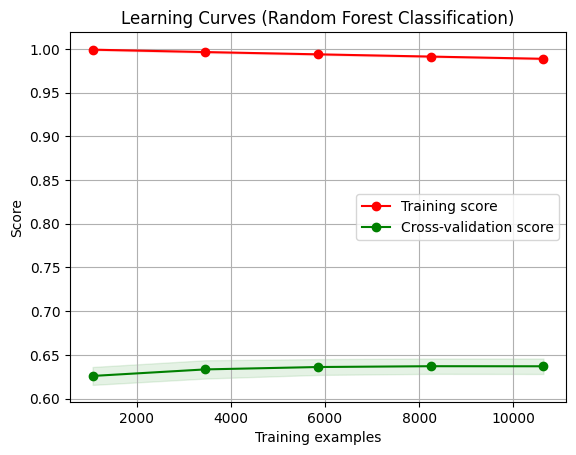

In [51]:
title = "Learning Curves (Random Forest Classification)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RandomForestClassifier()
print("x shape:", x.shape)
print("y shape:", y.shape)
print("y range:", np.min(y), np.max(y))
plot_learning_curve(estimator, title, x, y, cv=cv, n_jobs=4)
plt.show()

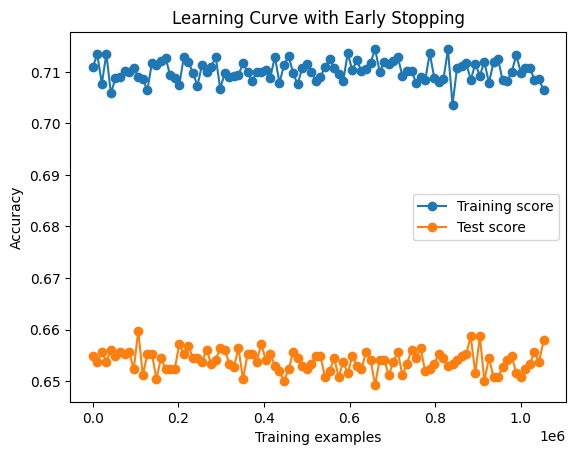

In [52]:
train_sizes, train_scores, test_scores = [], [], []
for i in range(100):  
    best_model.fit(x_train, y_train)
    
    train_sizes.append(i * len(x_train))
    train_scores.append(accuracy_score(y_train, best_model.predict(x_train)))
    test_scores.append(accuracy_score(y_test, best_model.predict(x_test)))

    if len(test_scores) > 10 and test_scores[-1] < min(test_scores[-10:]):
        break

plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Test score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.title("Learning Curve with Early Stopping")
plt.show()

In [53]:
y_pred=best_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6578947368421053


In [54]:
serial=[i for i in range(1,y_pred.shape[0]+1)]

In [55]:
op={
    'S_no':serial,
    'Actual':y_test,
    'Prediction':y_pred
}
ans=pd.DataFrame(op)

In [56]:
ans

,S_no,Actual,Prediction
12587,1,0,0
9406,2,0,0
2455,3,0,0
8204,4,0,0
1730,5,1,0
...,...,...,...
9343,2656,1,0
694,2657,0,0
5163,2658,1,1
11300,2659,1,0


In [57]:
ans['Actual'].value_counts()

Actual
0    1646
1    1014
Name: count, dtype: int64

In [58]:
ans['Prediction'].value_counts()

Prediction
0    2084
1     576
Name: count, dtype: int64

In [59]:
x_test.shape

(2660, 13)

In [61]:
x_test.head(2)

,cibil_score,new_customer,category,employment_type,no_of_dependencies,education,residence,house,employment_type,months_of_working,income_expenses_ratio,asset_loan_ratio,tenure
12587,2,0,1,1,3,0,0,2,1,72,0,0.668978,12
9406,2,0,1,1,3,1,0,2,1,13,2,0.503716,18


In [62]:
y_test.head(2)

12587    0
9406     0
Name: loan_approval, dtype: int64

In [67]:
print("Getting input")
inp,dot=[],'.'
for i in range(13):
    print("Enter Value for ",x_test.columns[i])
    val=input()
    if dot in val: inp.append(float(val))
    else: inp.append(int(val))
inp_np=np.array(inp).reshape(1,-1)
print("Showing Prediction")
best_model.predict(inp_np)

Getting input
Enter Value for  cibil_score


 2


Enter Value for  new_customer


 0


Enter Value for  category


 1


Enter Value for  employment_type


 1


Enter Value for  no_of_dependencies


 3


Enter Value for  education


 0


Enter Value for  residence


 0


Enter Value for  house


 2


Enter Value for  employment_type


 1


Enter Value for  months_of_working


 72


Enter Value for  income_expenses_ratio


 0


Enter Value for  asset_loan_ratio


 0.668978


Enter Value for  tenure


 12


Showing Prediction


array([0], dtype=int64)

In [71]:
check=np.array([2,0,1,1,3,0,0,2,1,72,0,0.668978,12]).reshape(1,-1)
op=best_model.predict(check)
print("Loan Sanctioned" if op[0]==1 else "Loan Not Sanctioned")

Loan Not Sanctioned
